In [159]:
import pandas as pd
from google.colab import files,drive
import matplotlib.pyplot as plt
uplode= files.upload()



Saving 2017_jun_final - 2017_jun_final.csv to 2017_jun_final - 2017_jun_final (7).csv


In [160]:
file= pd.read_csv('2017_jun_final - 2017_jun_final.csv')
filee=pd.DataFrame(file)

In [161]:
file_read=filee.head(1)
print(file_read)

   N                Role Programming language Specialisation  Experience   \
0  1  Junior QA engineer                  NaN       Manual QA         0.5   

  Experience on current job  Salary/month  Изменение.зарплаты.за.12.месяцев  \
0                       0.5           400                                 0   

        City        Company size  ... Still student English    Subject.area  \
0  New York   up to 10 employees  ...          True       A1  iOS,eCommerce   

                  Date                                         User.Agent  \
0  12/06/2017 12:38:08  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...   

   exp current_job_exp salary Валюта cls  
0  0.5             0.5    400    NaN  QA  

[1 rows x 25 columns]


In [162]:
print(filee.shape)

(8704, 25)


In [163]:
print(filee.dtypes)

N                                     int64
Role                                 object
Programming language                 object
Specialisation                       object
Experience                           object
Experience on current job            object
Salary/month                          int64
Изменение.зарплаты.за.12.месяцев      int64
City                                 object
Company size                         object
Company type                         object
Gender                               object
Age                                   int64
Education                            object
University                           object
Still student                          bool
English                              object
Subject.area                         object
Date                                 object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [164]:
space=filee.isnull().sum()
print(space)

N                                      0
Role                                   0
Programming language                3850
Specialisation                      7219
Experience                             0
Experience on current job              0
Salary/month                           0
Изменение.зарплаты.за.12.месяцев       0
City                                   0
Company size                           0
Company type                           0
Gender                                 0
Age                                    0
Education                              0
University                          1546
Still student                          0
English                                0
Subject.area                         223
Date                                   0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [165]:
lang=filee['Programming language']
clean=filee.dropna(axis=1, how='any').join(lang)


In [166]:
space=filee.isnull().sum()
print(space)

N                                      0
Role                                   0
Programming language                3850
Specialisation                      7219
Experience                             0
Experience on current job              0
Salary/month                           0
Изменение.зарплаты.за.12.месяцев       0
City                                   0
Company size                           0
Company type                           0
Gender                                 0
Age                                    0
Education                              0
University                          1546
Still student                          0
English                                0
Subject.area                         223
Date                                   0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [167]:
n_table=filee.dropna(axis=1, thresh=100)
print(n_table.shape)
print(n_table)

(8704, 24)
         N                      Role Programming language Specialisation   \
0        1        Junior QA engineer                  NaN       Manual QA   
1        2        Junior QA engineer                  NaN       Manual QA   
2        3         Software Engineer              C#/.NET             NaN   
3        4         Software Engineer           JavaScript             NaN   
4        5  Senior Software Engineer           JavaScript             NaN   
...    ...                       ...                  ...             ...   
8699  8700               QA engineer                  NaN       Manual QA   
8700  8701                 Marketing                  NaN             NaN   
8701  8702  Junior Software Engineer           Ruby/Rails             NaN   
8702  8703                 Team lead                  NaN             NaN   
8703  8704  Senior Software Engineer                 Java             NaN   

            Experience  Experience on current job  Salary/month 

In [168]:
python_data= filee[filee["Programming language"]=="Python"]
print(python_data.shape)
print(python_data.head(3))


(207, 25)
     N                      Role Programming language Specialisation   \
12  13         Software Engineer               Python             NaN   
68  69         Software Engineer               Python             NaN   
87  88  Junior Software Engineer               Python             NaN   

   Experience  Experience on current job  Salary/month  \
12           1         loss then 3 month           800   
68         1.5                       0.5           900   
87         0.5                       0.5           600   

    Изменение.зарплаты.за.12.месяцев    City        Company size  ...  \
12                               200  Berlin  up to 50 employees  ...   
68                               900  Berlin  up to 10 employees  ...   
87                                 0  Berlin  up to 10 employees  ...   

   Still student English                Subject.area                 Date  \
12         False       A1      Web development,Other  12/06/2017 13:05:54   
68          True 

In [169]:
python_data["Salary/month"]=pd.to_numeric(python_data['Salary/month'], errors='coerce')
salary=python_data.groupby('Role')['Salary/month'].agg(min='min', max='max')
print(salary)

                           min   max
Role                                
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


<ipython-input-169-de3e98e453ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data["Salary/month"]=pd.to_numeric(python_data['Salary/month'], errors='coerce')


In [170]:
def salary(python_data):
    return python_data['Salary/month'].mean()
python_data['AVG']=python_data.apply(lambda row: salary(python_data), axis=1)
print(python_data)

         N                      Role Programming language Specialisation   \
12      13         Software Engineer               Python             NaN   
68      69         Software Engineer               Python             NaN   
87      88  Junior Software Engineer               Python             NaN   
114    115  Junior Software Engineer               Python             NaN   
143    144  Junior Software Engineer               Python             NaN   
...    ...                       ...                  ...             ...   
8546  8547         Software Engineer               Python             NaN   
8625  8626         Software Engineer               Python             NaN   
8635  8636  Senior Software Engineer               Python             NaN   
8673  8674  Junior Software Engineer               Python             NaN   
8695  8696         Software Engineer               Python             NaN   

     Experience  Experience on current job  Salary/month  \
12             

<ipython-input-170-4538dec29a90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data['AVG']=python_data.apply(lambda row: salary(python_data), axis=1)


In [171]:
print(python_data['AVG'].describe().round(2))


count     207.00
mean     1753.94
std         0.00
min      1753.94
25%      1753.94
50%      1753.94
75%      1753.94
max      1753.94
Name: AVG, dtype: float64


In [172]:
python_data.to_csv("python_programer",index=False, encoding='utf-8-sig')

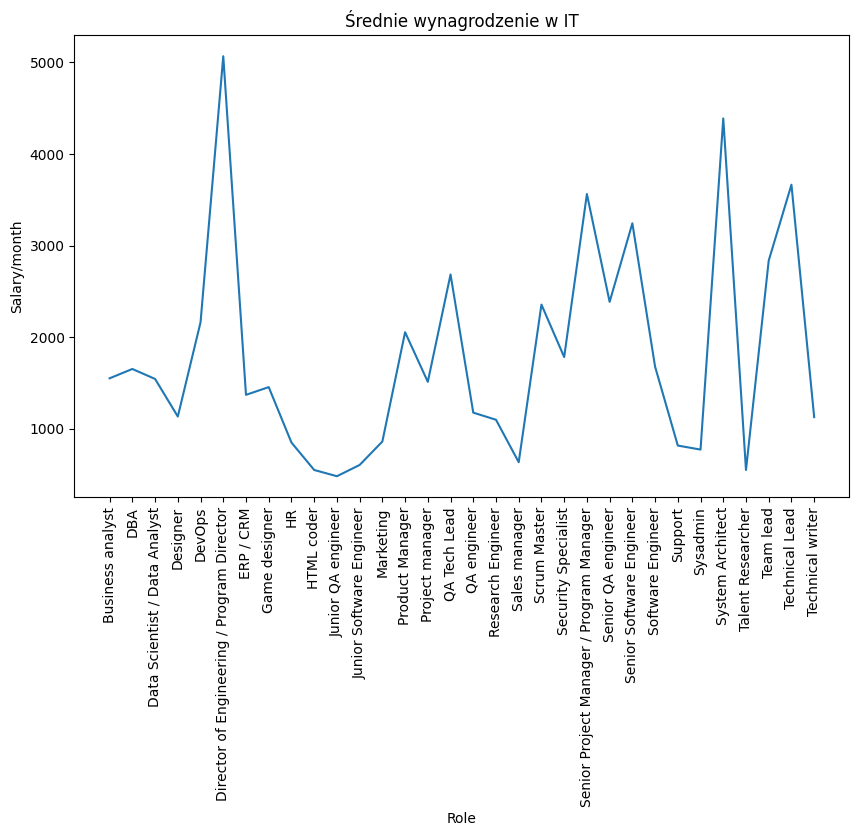

In [173]:
n_table=filee.groupby("Role")['Salary/month'].mean().reset_index()
x=n_table['Role']
y= n_table['Salary/month']

plt.figure(figsize=(10, 6))
plt.plot(x,y)
plt.xlabel("Role")
plt.xticks(rotation=90)
plt.ylabel('Salary/month')
plt.title('Średnie wynagrodzenie w IT')

plt.show()

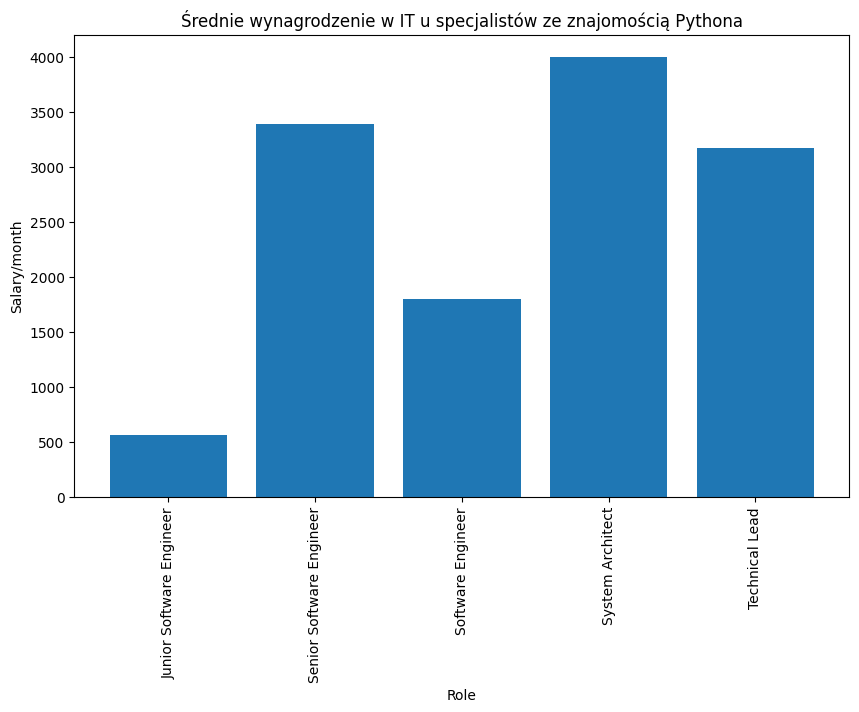

In [180]:
na_table=python_data.groupby("Role")['Salary/month'].mean().reset_index()

x=na_table["Role"]
y= na_table['Salary/month']


plt.figure(figsize=(10, 6))
plt.bar(x,y)
plt.xlabel("Role")
plt.xticks(rotation=90)
plt.ylabel('Salary/month')
plt.title('Średnie wynagrodzenie w IT u specjalistów ze znajomością Pythona')

plt.show()

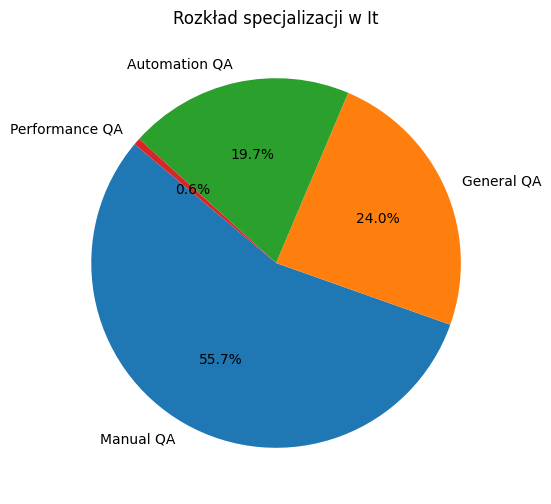

In [188]:
data=filee['Specialisation '].value_counts()
plt.figure(figsize=(10,6))
plt.pie(data, labels=data.index,autopct='%1.1f%%',startangle=140)
plt.title("Rozkład specjalizacji w IT")
plt.show()